# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yehuda Phedra Sanjaya
- **Email:** phedra.yehuda@gmail.com
- **ID Dicoding:** yehudaphedra

## Menentukan Pertanyaan Bisnis

-  jam berapa penyewa sepeda paling banyak dan paling sedikit ?
- pada musim apa penyewaan sepeda paling banyak dan sedikit ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#membaca tabel day
dayDf = pd.read_csv('day.csv')
dayDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#membaca tabel hour
hourDf = pd.read_csv('hour.csv')
hourDf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- mengetahui bahwa pada dataset dayDf mempunyai 16 kolom dicek menggunakan dayDf.head()
- mengetehaui bahwa pada dataset hourDf mempunyai 17 kolom dicek menggunakan hourDf.head()

### Assessing Data

In [4]:
#melakukan pengecekan tipe data yang berada didalam dayDf dan hourDf
dayDf.info()
hourDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
#melakukan pengecekan apakah ada mssing value pada dayDf
dayDf.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#melakukan pengecekan apakah ada mssing value pada hourDf
hourDf.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# memeriksa duplikasi
print("Jumlah duplikasi: ", hourDf.duplicated().sum())
print("Jumlah duplikasi: ", dayDf.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [8]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam dayDf
dayDf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam hourDf
hourDf.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- kita dapat mengetahui tipe data apa saja yang ada pada dataset dayDf dan hourDf
- Tidak ada missing value pada dataset dayDf dan hourDf
- Tidak ada terjadi duplikasi

### Cleaning Data

In [10]:
# mengubah tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'
dayDf['dteday'] = pd.to_datetime(dayDf['dteday'])
hourDf['dteday'] = pd.to_datetime(hourDf['dteday'])

In [11]:
#Mengganti nama kolom
dayDf.rename(columns={'yr':'year','mnth':'month','weekday':'oneWeek', 'weathersit':'weatherSituation', 'windspeed':'windSpeed','cnt':'countCr','hum':'humidity'},inplace=True)
hourDf.rename(columns={'yr':'year','mnth':'month','weekday':'oneWeek', 'weathersit':'weatherSituation', 'windspeed':'windSpeed','cnt':'countCr','hum':'humidity'},inplace=True)

In [12]:
#merubah beberapa isi kolom
dayDf.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hourDf.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

dayDf.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hourDf.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

dayDf.weatherSituation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hourDf.weatherSituation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

dayDf.oneWeek.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hourDf.oneWeek.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

dayDf.year.replace((0,1), ('2011','2012'), inplace=True)
hourDf.year.replace((0,1), ('2011','2012'), inplace=True)

dayDf['humidity'] = dayDf['humidity']*100
hourDf['humidity'] = hourDf['humidity']*100

<ipython-input-12-702ced92eba8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dayDf.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-12-702ced92eba8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [13]:
#Membuat kolom baru bernama categoryDay yang menunjukan isi kolom tersebut weekend atau weekdays
oneWeek = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def getCategoryDay(oneWeek):
    if oneWeek in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hourDf["category_days"] = hourDf["oneWeek"].apply(getCategoryDay)
dayDf["category_days"] = dayDf["oneWeek"].apply(getCategoryDay)

**Insight:**
- merubah tipe data object menjadi datetime
- melakukan perubahan nama kolom dan juga merubah beberapa isi kolom agar mudah untuk diolah dan dibaca
- membuat kolom baru yang menunjukkan bahwa weekend atau weekdays

## Exploratory Data Analysis (EDA)

### Explore hourDf


In [14]:
# melihat rangkuman parameter statistik dari data hourDf
hourDf.describe(include="all")

,instant,dteday,season,year,month,hr,holiday,oneWeek,workingday,weatherSituation,temp,atemp,humidity,windSpeed,casual,registered,countCr,category_days
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2,NaN,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012,NaN,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,NaN,4496,8734,NaN,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,6.537775,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,4.000000,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,7.000000,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,10.000000,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,12.000000,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [15]:
# penyewaan berdasarkan jam
hourDf.groupby(by="hr").agg({
    "countCr": ["sum"]
})

,countCr
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


### Explore dayDf

In [16]:
# melihat rangkuman parameter statistik dari data dayDf
dayDf.describe(include="all")

,instant,dteday,season,year,month,holiday,oneWeek,workingday,weatherSituation,temp,atemp,humidity,windSpeed,casual,registered,countCr,category_days
count,731.000000,731,731,731,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,2,NaN,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,NaN,188,366,NaN,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,NaN,1.000000,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,NaN,1.000000,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,NaN,1.000000,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [17]:
# melihat jumlah penyewaan tiap musimnya
dayDf.groupby(by="season").countCr.sum().sort_values(ascending=False).reset_index().head(10)

,season,countCr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


**Insight:**
- berdasarkan output diatas bisa diambil kesimpulan bahwa paling banyak penyewaan sepeda saat jam 17.00, dan paling sedikit penyewaan sepeda saat jam 04.00
- berdasarkan output diatas bisa diambil kesimpulan bahwa musim Fall ada musim yang paling banyak terjadi penyewaan sepeda, dan musim Spring adalah musim yang paling sedikit terjadi penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-18-4874a3728958>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="countCr", data=sumOrderItemsDf.head(5), palette=["grey", "grey", "green", "grey", "grey"], ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seab

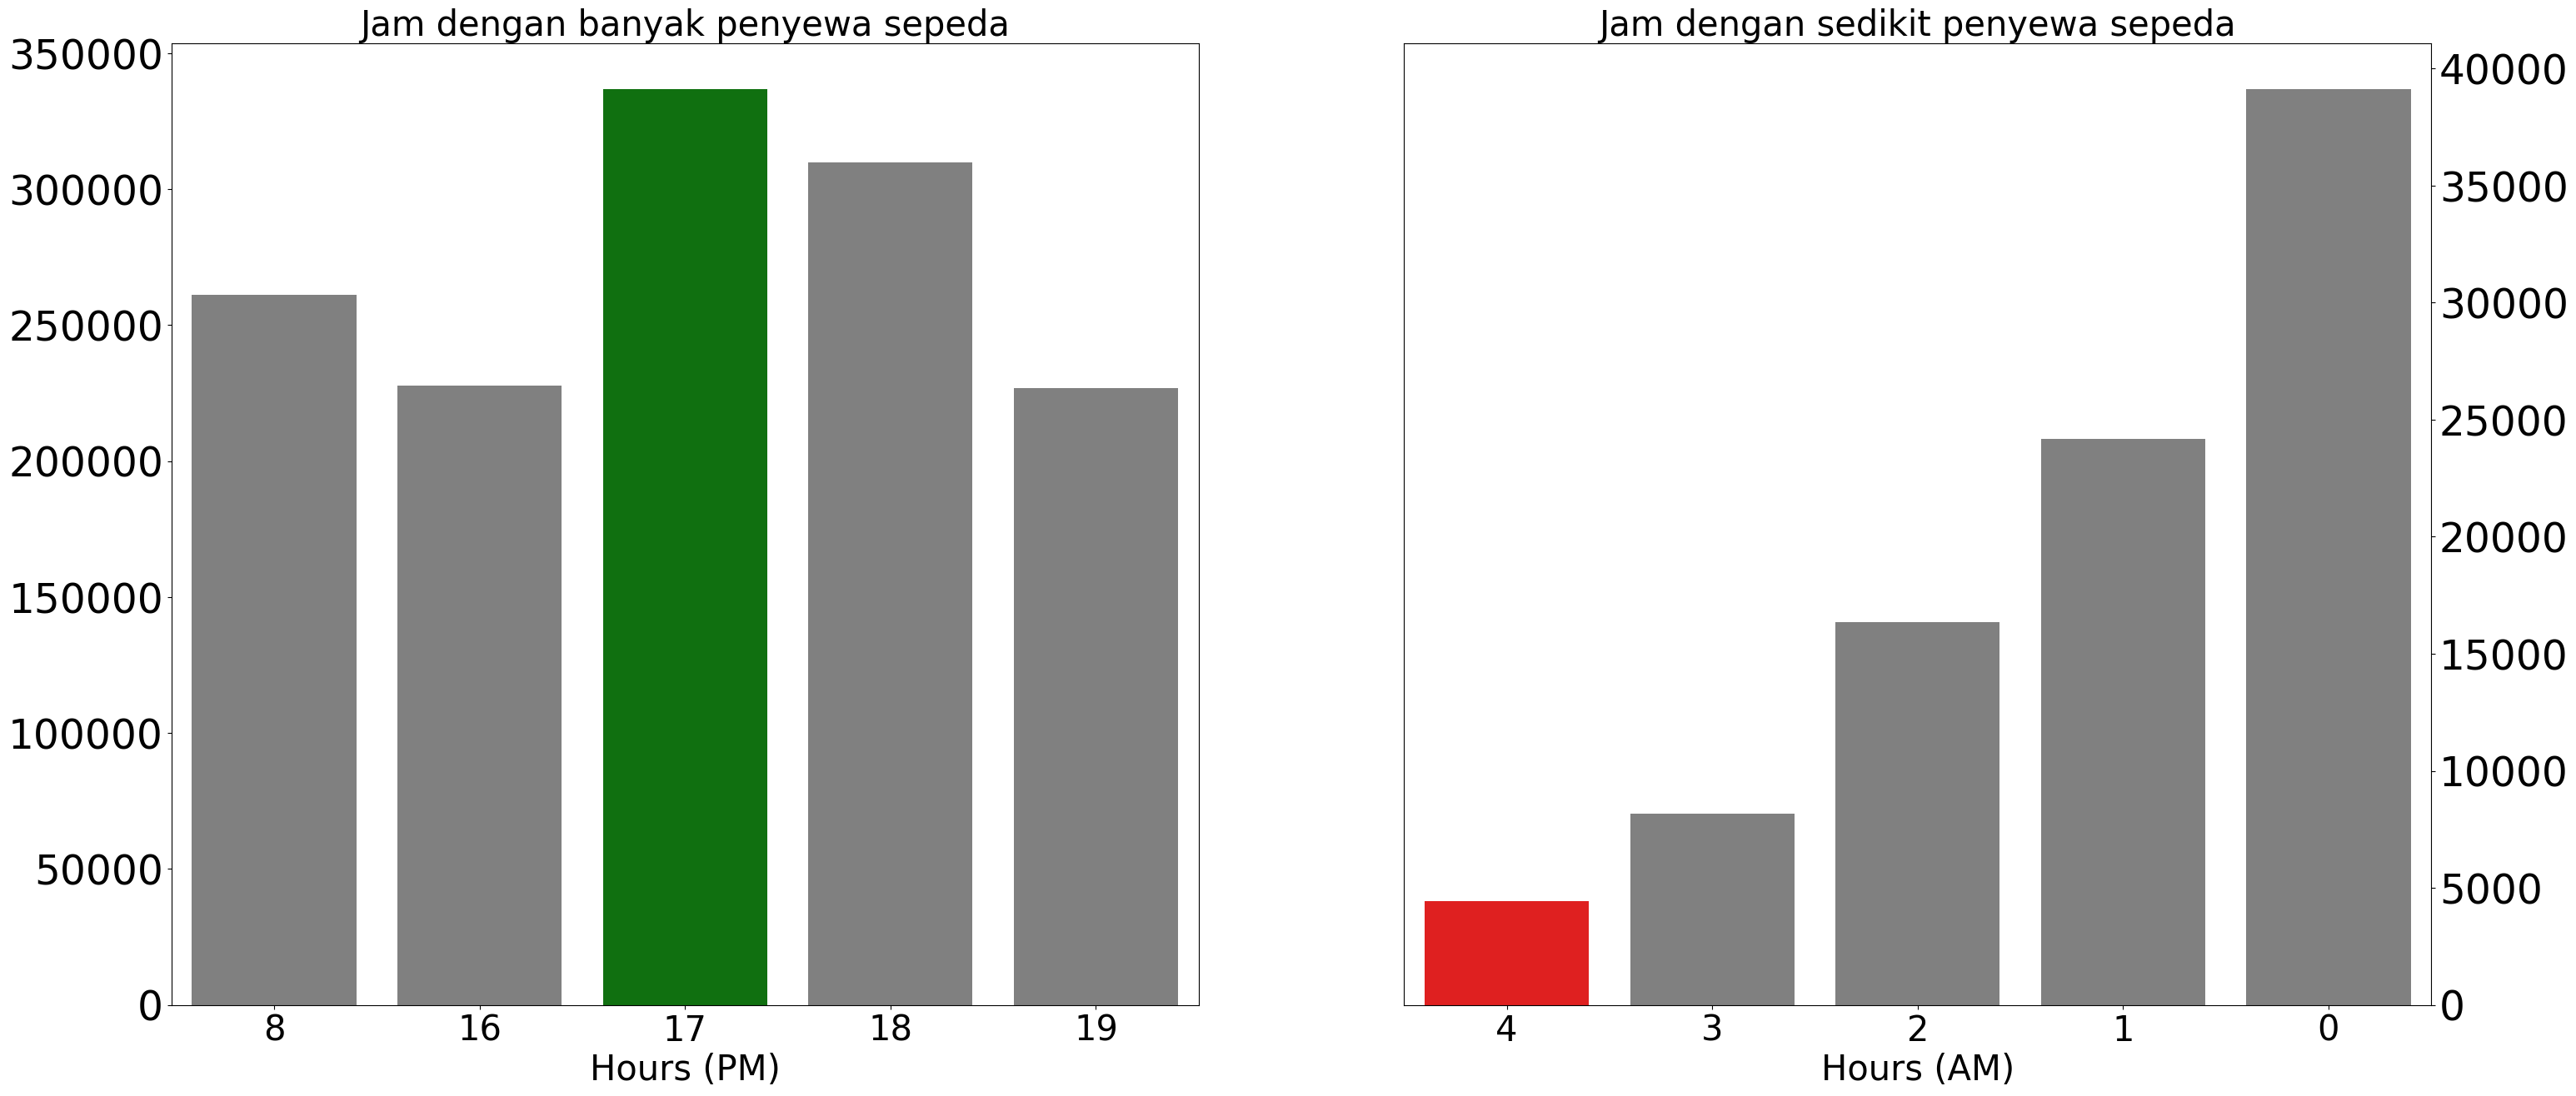

In [18]:
sumOrderItemsDf = hourDf.groupby("hr").countCr.sum().sort_values(ascending=False).reset_index()

# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hr", y="countCr", data=sumOrderItemsDf.head(5), palette=["grey", "grey", "green", "grey", "grey"], ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(x="hr", y="countCr", data=sumOrderItemsDf.sort_values(by="hr", ascending=True).head(5), palette=["grey", "grey", "grey", "grey","red"], ax=ax[1])

# mengatur label dan judul untuk subplot pertama
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# menampilkan plot
plt.show()

### Pertanyaan 2:

<ipython-input-19-cc1bfb127ac0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="countCr", x="season", data=dayDf.sort_values(by="season", ascending=False), palette=["grey", "grey", "red", "green"],ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dis

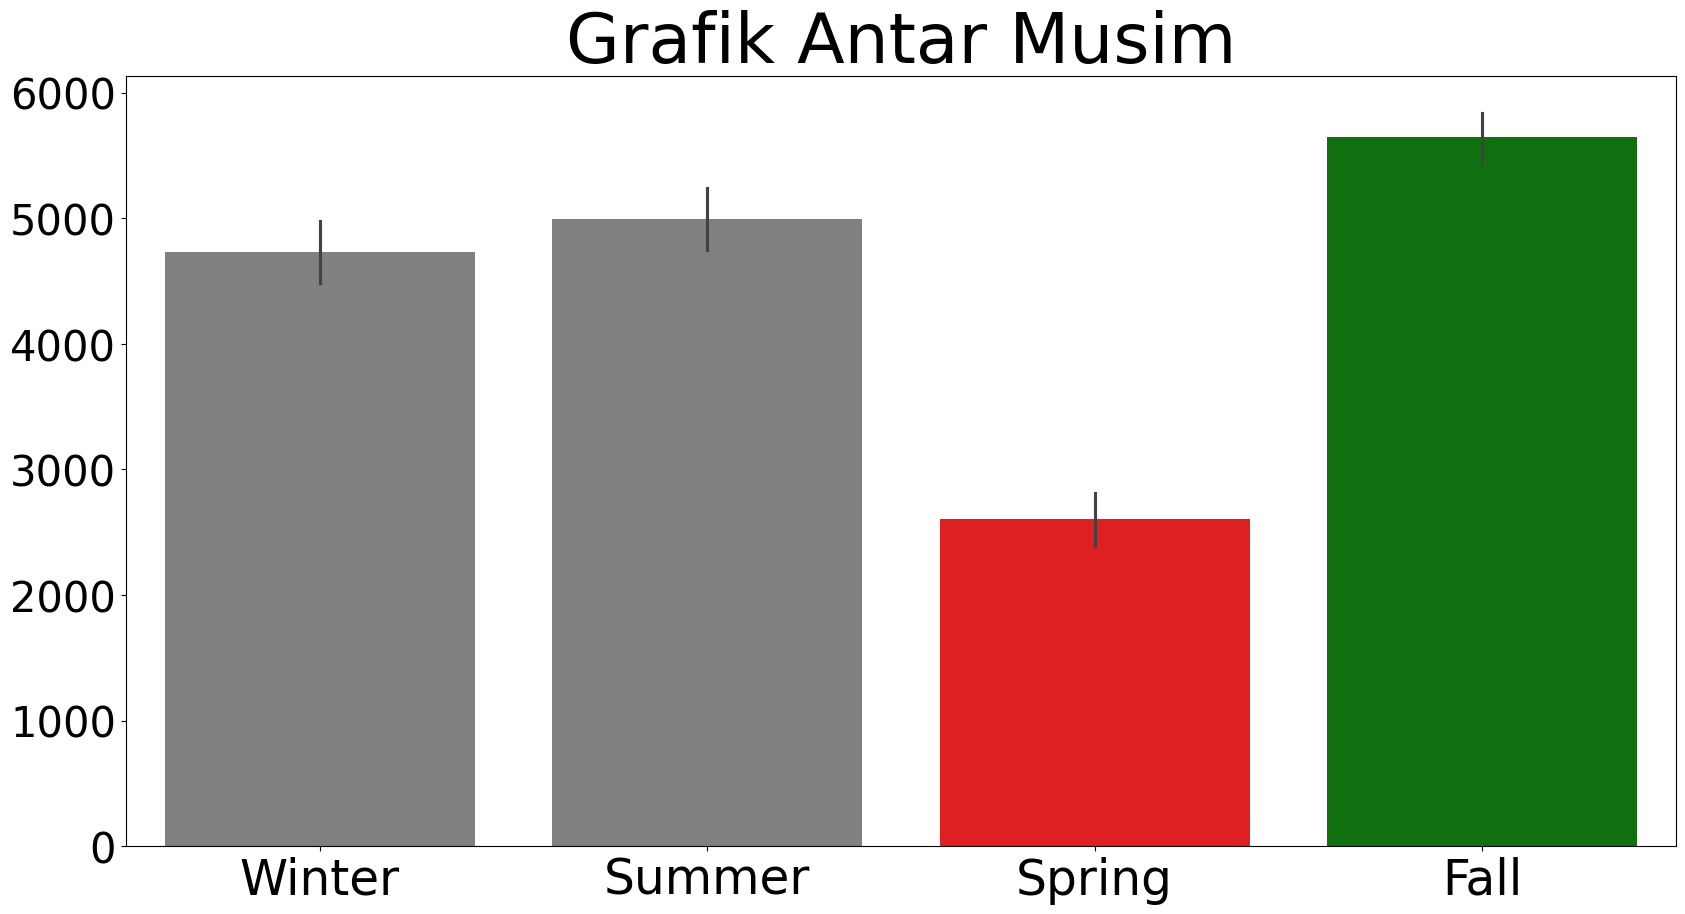

In [19]:
# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_Cr" dan x="season", menggunakan data=dayDf
sns.barplot(y="countCr", x="season", data=dayDf.sort_values(by="season", ascending=False), palette=["grey", "grey", "red", "green"],ax=ax)

# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()

**Insight:**
- bisa kita lihat bahwa pada hasil chart hourDf kita mendapatkan bahwa pada saat jam 17.00 adalah jam terjadinya penyewaan sepeda terbanyak, sedangkan pada jam 04.00 adalah jam terjadinya penyewaan sepeda terkecil
- kita juga dapat melihat bahwa pada hasil dayDf bahwa pada musim Fall terjadi penyewaan ssepeda terbanyak, dan pada musim Spring terjadi penyewaan sepeda terkecil

## Analisis Lanjutan (Opsional)

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

- Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
- Frequency (banyaknya pelanggan dalam berinteraksi)
- Monetary (banyaknya uang yang mereka gunakan)

In [20]:
#menerapkan teknik RFM analysis
currentDate = max(hourDf['dteday'])
rfmDf = hourDf.groupby('registered').agg({
    'dteday': lambda x: (currentDate - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'countCr': 'sum'  # Monetary
}).reset_index()

rfmDf.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfmDf.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


## Conclusion

- Conclusion pertanyaan 1 : berdasarkan chart diatas kita bisa lihat bahwa penyewaan sepeda paling banyak digunakan pada jam 17.00, dan paling sedikit jam 04.00
- Conclusion pertanyaan 2 : berdasarkan chart diatas kita bisa lihat bahwa musim Fall adalah musim terbanyak terjadinya penyewaan sepeda, dan musim Spring adalah musim terkecil terjadinya penyewaan sepeda